In [4]:
import pandas as pd
import os

import nltk
import itertools

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def filter_useful_words(words):
    pos_tags = nltk.pos_tag(words)
    useful_words = []
    for pos_tag in pos_tags:
        word = pos_tag[0]
        tag = pos_tag[1]
        if tag[:2] in ['NN', 'JJ', 'VB', 'RB', 'PR']:
            useful_words.append(word)
    return useful_words

def get_sentence_score(text):
    sentences = nltk.sent_tokenize(text)
    return len(sentences)

def get_useful_words_score(text):
    sentences = nltk.sent_tokenize(text)
    words = [nltk.word_tokenize(sent) for sent in sentences]
    useful_words = [filter_useful_words(word) for word in words]
    flattened_useful_words = list(itertools.chain.from_iterable(useful_words))
    flattened_words = list(itertools.chain.from_iterable(words))
    return len(flattened_useful_words) / len(flattened_words)


def plot_scatter(df):
    df = df.copy()
    df['Label'] = df['result']
    df['X'] = df['sentence_score']
    df['Y'] = df['useful_word_score']
    pallete = {'insightful': 'green', 'somewhat insightful': 'black', 'insightless': 'blue', 'outdated': 'yellow'}
    # Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='X', y='Y', palette=pallete, hue=df['result'])

    # Add labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot with Annotated Labels')

    # Show plot
    plt.grid(True)
    plt.show()


files = os.listdir('./output')
df_list = [pd.read_json(f'./output/{file}') for file in files]
df = pd.concat(df_list)

In [5]:
df = pd.read_csv('./data.csv')
df.head()

/var/folders/b3/hrj2lh1d06n_0ldwgv0m27xh0000gn/T/ipykernel_60414/1533204463.py:1: DtypeWarning: Columns (0,1,7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data.csv')


,Unnamed: 0,id,url,username,text,created_at,quote_count,reply_count,retweet_count,favorite_count,reason,choice,ranking_date
0,0,1770066758214336881,https://x.com/HsakaTrades/status/1770066758214...,HsakaTrades,want to slurp\n\nrisk manager is only permitti...,2024-03-19T12:36:16+00:00,14.0,164,89,2299.0,Lacks meaningful information or insights.,insightless,NaN
1,1,1770096334856421663,https://x.com/HsakaTrades/status/1770096334856...,HsakaTrades,wonder when the burgers entered the orderbooks...,2024-03-19T14:33:47+00:00,1.0,29,10,477.0,"Contains minimal information, lacks depth or i...",insightless,NaN
2,2,1770159914322629021,https://x.com/HsakaTrades/status/1770159914322...,HsakaTrades,https://t.co/zA7pR9qYfg,2024-03-19T18:46:26+00:00,2.0,41,12,613.0,No information provided.,insightless,NaN
3,3,1770152817753284622,https://x.com/HsakaTrades/status/1770152817753...,HsakaTrades,RT @geenty: Binance is regaining a large porti...,2024-03-19T18:18:14+00:00,23.0,46,66,533.0,Provides some insight about Binance regaining ...,somewhat insightful,NaN
4,4,1770155247006089543,https://x.com/HsakaTrades/status/1770155247006...,HsakaTrades,RT @rleshner: Congratulations @BlackRock and @...,2024-03-19T18:27:53+00:00,206.0,144,341,1912.0,Congratulations message on the launch of Black...,insightful,NaN


In [6]:
import random

data = []
for i in range(df.shape[0]):
    row = df.iloc[i]
    try:
        data.append({
            'sentence_score': get_sentence_score(row['text']) + random.random(),
            'useful_word_score': get_useful_words_score(row['text']) + random.random(),
            'result': row['choice'],
            'text': row['text'],
            'reason': row['reason']
        })
    except Exception as e:
        print(f'Error in row {i}: {e}')
tf = pd.DataFrame(data)

Error in row 34314: expected string or bytes-like object
Error in row 34315: expected string or bytes-like object
Error in row 34316: expected string or bytes-like object


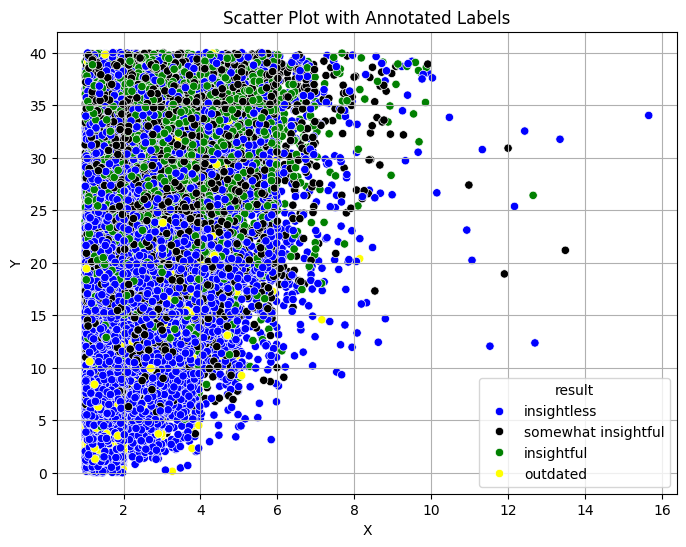

In [85]:
plot_scatter(tf[(tf['useful_word_score'] < 40) & (tf['sentence_score'] < 20)])

In [73]:
# tf[tf['sentence_score'] > 7]['text'].values
tf[tf['text'].str.contains('http')]['result'].value_counts()

result
insightless            100
insightful              37
somewhat insightful     22
outdated                12
Name: count, dtype: int64